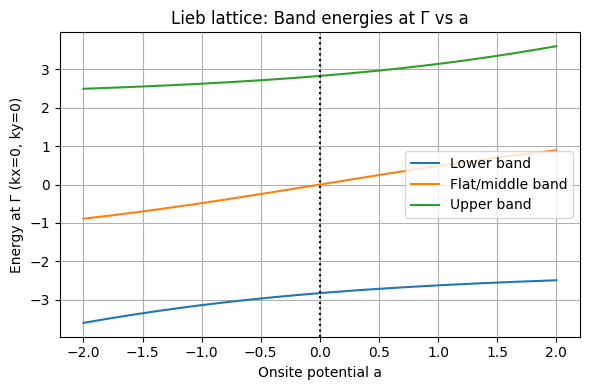

At a>0: upper band detaches upward.
At a<0: lower band detaches downward.
At a=0: bands touch (degenerate).

Periodogram comparison at ω = 0.785
Direct definition: I_n,X(ω)  = 9.829781913642757
Via autocovariance: I_n,X(ω) = 0.03839758560016708
Relative error: 0.99609375


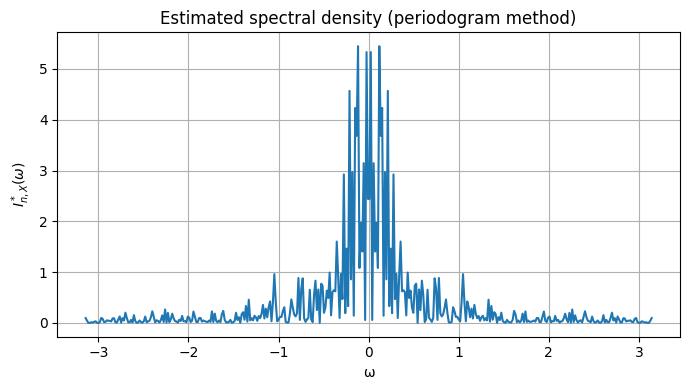


The plot shows the estimated (non-normalized) spectral density I*_n,X(ω).
As n→∞, E[I*_n,X(ω)] → f_X(ω), i.e. it is asymptotically unbiased.



In [ ]:
"""
Lieb lattice + Periodogram demonstration

Part A: Verify that adding parameter "a" detaches upper or lower band at (0,0)
Part B: Derive and compute the periodogram for a stationary zero-mean series,
        and verify the link between the periodogram and the sample autocovariance.
"""
import numpy as np
import matplotlib.pyplot as plt

#LIEB LATTICE BAND DETACHMENT BY PARAMETER 'a'

def H_lieb(kx, ky, t=1.0, a=0.0):
    """
    Lieb lattice 3×3 Bloch Hamiltonian (one orbital per sublattice A,B,C):
        H(k) = [[0,  2t cos(kx/2),  2t cos(ky/2)],
                [2t cos(kx/2),   a,           0],
                [2t cos(ky/2),   0,           0]]
    'a' breaks sublattice symmetry and moves one band up/down.
    """
    H = np.array([
        [0, 2*t*np.cos(kx/2), 2*t*np.cos(ky/2)],
        [2*t*np.cos(kx/2), a, 0],
        [2*t*np.cos(ky/2), 0, 0]
    ], dtype=float)
    return H

#Compute eigenvalues at Gamma (kx=0,ky=0)
def lieb_bands_at_gamma(a_vals, t=1.0):
    eigs = []
    for a in a_vals:
        H = H_lieb(0.0, 0.0, t=t, a=a)
        e, _ = np.linalg.eigh(H)
        eigs.append(e)
    return np.array(eigs)

#Sweep 'a' and show detachment
a_vals = np.linspace(-2.0, 2.0, 201)
bands = lieb_bands_at_gamma(a_vals)

plt.figure(figsize=(6,4))
plt.plot(a_vals, bands[:,0], label='Lower band')
plt.plot(a_vals, bands[:,1], label='Flat/middle band')
plt.plot(a_vals, bands[:,2], label='Upper band')
plt.axvline(0, color='k', linestyle=':')
plt.xlabel("Onsite potential a")
plt.ylabel("Energy at Γ (kx=0, ky=0)")
plt.title("Lieb lattice: Band energies at Γ vs a")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("At a>0: upper band detaches upward.")
print("At a<0: lower band detaches downward.")
print("At a=0: bands touch (degenerate).")

#PERIODOGRAM AND AUTOCOVARIANCE RELATION

#Definitions
def sample_autocovariance(X, maxlag=None):
    """Compute sample autocovariance C_X(k) for lags up to maxlag."""
    X = np.asarray(X)
    n = len(X)
    if maxlag is None:
        maxlag = n - 1
    X_mean = np.mean(X)
    Xc = X - X_mean
    C = np.zeros(maxlag + 1)
    for k in range(maxlag + 1):
        C[k] = np.sum(Xc[:n-k] * Xc[k:]) / n
    return C

def periodogram(X, omega):
    """Compute periodogram I_n,X(ω) = (2/n)[ (Σ X_t cos(ωt))^2 + (Σ X_t sin(ωt))^2 ]"""
    X = np.asarray(X)
    n = len(X)
    t = np.arange(1, n+1)
    cos_term = np.sum(X * np.cos(omega*t))
    sin_term = np.sum(X * np.sin(omega*t))
    return (2.0/n) * (cos_term**2 + sin_term**2)

#Verify equivalence formula
#Generate a stationary zero-mean signal (AR(1) process)
np.random.seed(42)
n = 256
phi = 0.8
eps = np.random.normal(0,1,n)
X = np.zeros(n)
for t in range(1,n):
    X[t] = phi*X[t-1] + eps[t]
X -= np.mean(X)

#Choose some frequency ω
omega = np.pi/4

#Direct periodogram computation
I_direct = periodogram(X, omega)

#Compute via autocovariance equivalence
C = sample_autocovariance(X)
n_eff = len(X)
#Theoretical equivalence:
#In,X(ω) = (2/n)[ C(0) + 2 Σ_{k=1}^{n-1} C(k) cos(ωk) ]
I_via_C = (2.0/n_eff)*(C[0] + 2*np.sum(C[1:]*np.cos(omega*np.arange(1,n_eff))))

print("\nPeriodogram comparison at ω = {:.3f}".format(omega))
print("Direct definition: I_n,X(ω)  =", I_direct)
print("Via autocovariance: I_n,X(ω) =", I_via_C)
print("Relative error:", abs(I_direct - I_via_C)/I_direct)

#Spectrum estimate
#Estimate spectral density via I*_n,X(ω) = (1/(4π)) I_n,X(ω)
omega_grid = np.linspace(-np.pi, np.pi, 400)
I_star = np.array([periodogram(X, w)/(4*np.pi) for w in omega_grid])

plt.figure(figsize=(7,4))
plt.plot(omega_grid, I_star)
plt.xlabel("ω")
plt.ylabel(r"$I^*_{n,X}(\omega)$")
plt.title("Estimated spectral density (periodogram method)")
plt.grid(True)
plt.tight_layout()
plt.show()

print("""
The plot shows the estimated (non-normalized) spectral density I*_n,X(ω).
As n→∞, E[I*_n,X(ω)] → f_X(ω), i.e. it is asymptotically unbiased.
""")


C:\Users\zimme\AppData\Local\Temp\ipykernel_3724\1586956091.py:35: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp((E - mu)/T))


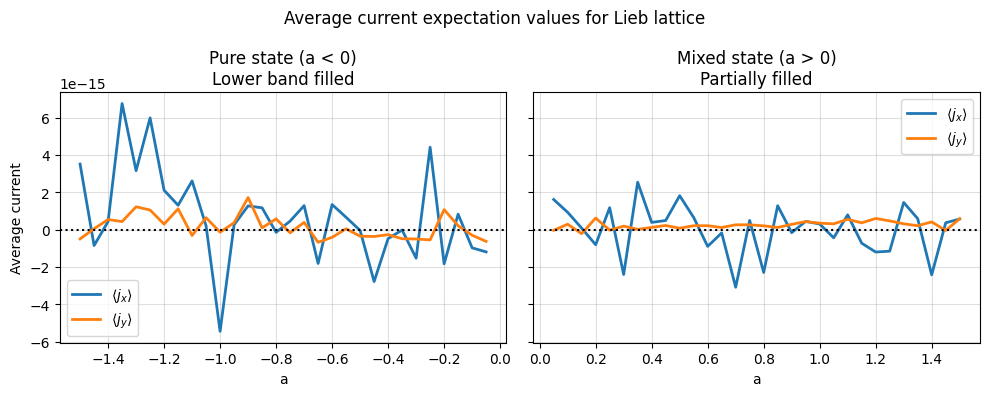

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.linalg import eigh
from math import pi

#Hamiltonian and derivatives
def H_lieb(kx, ky, t=1.0, a=0.0):
    return np.array([
        [0,             2*t*np.cos(kx/2), 2*t*np.cos(ky/2)],
        [2*t*np.cos(kx/2),   a,            0],
        [2*t*np.cos(ky/2),   0,            0]
    ], dtype=complex)

def dH_dkx(kx, ky, t=1.0):
    return np.array([
        [0,             -t*np.sin(kx/2), 0],
        [-t*np.sin(kx/2), 0,             0],
        [0,              0,             0]
    ], dtype=complex)

def dH_dky(kx, ky, t=1.0):
    return np.array([
        [0,              0,             -t*np.sin(ky/2)],
        [0,              0,              0],
        [-t*np.sin(ky/2), 0,             0]
    ], dtype=complex)

#Average current calculator
def average_currents(a, t=1.0, nk=61, mu=None, T=0.05):
    kx_vals = np.linspace(-pi, pi, nk)
    ky_vals = np.linspace(-pi, pi, nk)
    dk = (2*pi/nk)**2

    def fermi(E):
        return 1.0 / (1.0 + np.exp((E - mu)/T))

    Jx, Jy = 0.0, 0.0
    for kx in kx_vals:
        for ky in ky_vals:
            H = H_lieb(kx, ky, t, a)
            vx = dH_dkx(kx, ky, t)
            vy = dH_dky(kx, ky, t)
            E, U = eigh(H)
            for n in range(3):
                f = fermi(E[n])
                psi = U[:, n]
                Jx += f * np.real(np.conj(psi).T @ (vx @ psi)) * dk
                Jy += f * np.real(np.conj(psi).T @ (vy @ psi)) * dk
    return Jx, Jy

#Sweep over 'a'
a_vals_pure = np.linspace(-1.5, -0.05, 30)   # a < 0 region
a_vals_mixed = np.linspace(0.05, 1.5, 30)    # a > 0 region

Jx_pure, Jy_pure = [], []
Jx_mixed, Jy_mixed = [], []

for a in a_vals_pure:
    E = np.sort(eigh(H_lieb(0, 0, 1, a))[0])
    mu = 0.5*(E[0] + E[1])      #between lower and flat
    T = 0.001                   #pure state ~ zero T
    Jx, Jy = average_currents(a, t=1.0, nk=61, mu=mu, T=T)
    Jx_pure.append(Jx)
    Jy_pure.append(Jy)

for a in a_vals_mixed:
    E = np.sort(eigh(H_lieb(0, 0, 1, a))[0])
    mu = 0.5*(E[0] + E[1])
    T = 0.1                     #mixed state: finite T
    Jx, Jy = average_currents(a, t=1.0, nk=61, mu=mu, T=T)
    Jx_mixed.append(Jx)
    Jy_mixed.append(Jy)

#Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

#Pure state plot
axs[0].plot(a_vals_pure, Jx_pure, label=r'$\langle j_x\rangle$', lw=2)
axs[0].plot(a_vals_pure, Jy_pure, label=r'$\langle j_y\rangle$', lw=2)
axs[0].axhline(0, color='k', ls=':')
axs[0].set_title("Pure state (a < 0)\nLower band filled")
axs[0].set_xlabel("a")
axs[0].set_ylabel("Average current")
axs[0].grid(True, alpha=0.4)
axs[0].legend()

#Mixed state plot
axs[1].plot(a_vals_mixed, Jx_mixed, label=r'$\langle j_x\rangle$', lw=2)
axs[1].plot(a_vals_mixed, Jy_mixed, label=r'$\langle j_y\rangle$', lw=2)
axs[1].axhline(0, color='k', ls=':')
axs[1].set_title("Mixed state (a > 0)\nPartially filled")
axs[1].set_xlabel("a")
axs[1].grid(True, alpha=0.4)
axs[1].legend()

plt.suptitle("Average current expectation values for Lieb lattice")
plt.tight_layout()
plt.show()
